# StrongCNN Catalog

This notebook is provided to help _you_ look at the database. There are a couple useful (at least in my experience) widgets for visualizing the dataset, as well as a simple example for how you can divy up the catalog to examine other properties.

In the box below, cd to the directory containing this notebook, the catalogs, and the cutouts.

In [1]:
cd /nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics/

/nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics


In [13]:
%matplotlib inline
import pandas as pd
from notebook_helper import *

cluster_catalog = pd.read_csv('./catalog.csv', index_col=0)

`mpld3` is not strictly needed to make the below code work, but it has helpful tools like a zoom function.

In [3]:
import mpld3
mpld3.enable_notebook()

Let's see what columns we have in our catalog:

In [4]:
print(cluster_catalog.columns)

Index([u'ID', u'ZooID', u'location', u'mean_probability', u'category', u'kind', u'field_flavor', u'state', u'status', u'truth', u'stage', u'object_id', u'x', u'y', u'markers_in_object', u'skill_sum', u'markers_in_field', u'people_marking_objects', u'people_marking_field', u'people_looking_at_field', u'object_size', u'field_name', u'object_name', u'object_flavor'], dtype='object')


In `notebook_helper.py` are a couple IPython widgets to get you started looking at the catalogs. `examine_catalog` lets you hierarchically break up the the entries in the catalog.

In [5]:
examine_catalog(cluster_catalog)

stage  field_flavor     object_flavor            
1      dud              dud                          1281
       lensed galaxy    dud                           398
                        known lens                      9
                        simulated lensed galaxy      1915
       lensed quasar    dud                           303
                        known lens                      9
                        simulated lensed quasar      1960
       lensing cluster  dud                           298
                        known lens                     16
                        simulated lensing cluster    1896
2      dud              dud                           248
       lensed galaxy    dud                            25
                        known lens                      1
                        simulated lensed galaxy       148
       lensing cluster  dud                            13
                        simulated lensing cluster       8
       test           

With `examine_cutouts` we can look at the individual cutouts as well as some of their properties. See the README.md for details on what each column means!

ZooID                                   ASW0008kan
object_id                                     5755
stage                                            1
field_flavor                         lensed quasar
object_flavor              simulated lensed quasar
status                                    detected
markers_in_object                               29
markers_in_field                                29
people_marking_objects                          21
people_marking_field                            21
people_looking_at_field                         26
object_size                               7.789724
mean_probability                                 1
x                                         299.8943
y                                         70.23182
Name: 5755, dtype: object

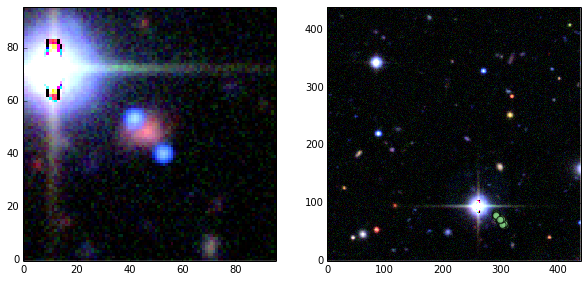

In [6]:
examine_cutouts(cluster_catalog)

# Looking at specific entries in the catalog.

We can also filter out our catalog to look at specific subtypes. Let's look at all entries with `cluster_type = known lens`. We'll call it a `cluster_knownlens_catalog`.

In [7]:
cluster_knownlens_catalog = cluster_catalog[cluster_catalog['object_flavor'] == 'known lens']

In [8]:
examine_catalog(cluster_knownlens_catalog)

stage  field_flavor     object_flavor
1      lensed galaxy    known lens         9
       lensed quasar    known lens         9
       lensing cluster  known lens        16
2      lensed galaxy    known lens         1
       test             known lens       101
dtype: int64


ZooID                      ASW0002zs2
object_id                        9298
stage                               2
field_flavor                     test
object_flavor              known lens
status                      undecided
markers_in_object                  15
markers_in_field                   15
people_marking_objects             15
people_marking_field               15
people_looking_at_field            48
object_size                  6.065287
mean_probability            0.5161076
x                            106.2732
y                            67.27823
Name: 9298, dtype: object

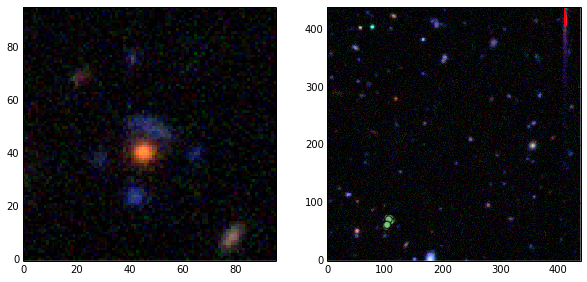

In [14]:
examine_cutouts(cluster_knownlens_catalog)

Of course, we can also make multiple cuts at once. Let's find the known lenses that `SpaceWarps` appeared to miss!

ZooID                      ASW000506n
object_id                       11433
stage                               2
field_flavor                     test
object_flavor              known lens
status                      undecided
markers_in_object                   4
markers_in_field                   11
people_marking_objects              4
people_marking_field                7
people_looking_at_field            50
object_size                  2.879669
mean_probability            0.1385119
x                            294.6087
y                             24.0663
Name: 11433, dtype: object

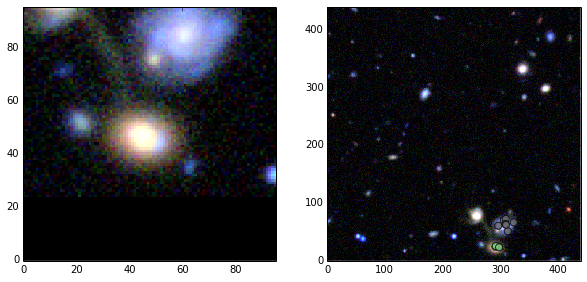

In [15]:
weak_knownlens_catalog = cluster_catalog[(cluster_catalog['object_flavor'] == 'known lens') &
                                          (cluster_catalog['mean_probability'] < 0.3)]
examine_cutouts(weak_knownlens_catalog)

In [21]:
weak_knownlens_catalog2 = cluster_catalog[(cluster_catalog['object_flavor'] == 'known lens') &
                                          (cluster_catalog['mean_probability'] < 0.3) &
                                          (cluster_catalog['stage'] == 2)]
weak_knownlens_catalog2[['ZooID', 'mean_probability',
                        'people_marking_objects', 'people_marking_field',
                        'people_looking_at_field', 'ID']]

,ZooID,mean_probability,people_marking_objects,people_marking_field,people_looking_at_field,ID
8965,ASW0002nsh,8.974819e-13,6,9,49,5183f151e4bb21021901e4f1
9044,ASW0007x7a,2.483268e-01,10,12,50,5183f151e4bb21021905a3d6
9088,ASW0007qve,1.811387e-01,12,12,50,5183f151e4bb2102190583ca
9428,ASW0006hoa,1.933380e-01,4,9,49,5183f151e4bb210219049efa
9823,ASW0004l7l,2.440299e-01,7,9,50,5183f151e4bb210219034461
9993,ASW0004p94,8.133099e-02,6,9,50,5183f151e4bb2102190358d8
9998,ASW0005exg,2.757075e-01,10,12,50,5183f151e4bb21021903dad4
10252,ASW00000k1,2.100528e-01,9,11,50,5183f151e4bb2102190002d1
10284,ASW0003s8h,8.261008e-02,8,10,50,5183f151e4bb21021902b1b1
10499,ASW0003of5,1.369771e-01,5,6,37,5183f151e4bb210219029e61
